In [129]:
import pandas as pd
from underthesea import ner
import string
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1. Đọc dữ liệu

In [146]:
data_test=pd.read_csv("/Users/maiphuong/Desktop/Nhóm 7/data/test.csv").dropna()
data_test.head()

,Column1,Column2,Column3,Column4
0,Chị,Ns,B-NP,O
1,Minh,NNP,B-NP,B-PER
2,ôm,V,B-VP,O
3,đứa,Ns,B-NP,O
4,con_gái,N,B-NP,O


In [147]:
tokens_list = []
ner_tags_list = []

# Tách các câu và chuyển đổi dữ liệu
tokens = []
ner_tags = []

for index, row in data_test.iterrows():
    tokens.append(row['Column1'])
    ner_tags.append(row['Column3'])

    if row['Column1'] == '.':
        tokens_list.append(tokens)
        ner_tags_list.append(ner_tags)
        tokens = []
        ner_tags = []

# Nếu còn từ trong danh sách mà chưa gặp dấu chấm, thêm câu vào danh sách
if tokens:
    tokens_list.append(tokens)
    ner_tags_list.append(ner_tags)

# Tạo DataFrame từ các câu đã tách
data_processed = {
    'tokens': tokens_list,
    'ner_tags': ner_tags_list
}

df_test = pd.DataFrame(data_processed)
df_test.head()

,tokens,ner_tags
0,"[Chị, Minh, ôm, đứa, con_gái, mới, hơn, hai, t...","[B-NP, B-NP, B-VP, B-NP, B-NP, O, B-AP, B-NP, ..."
1,"[Từ, đôi, mắt, thâm_quầng, mệt_mỏi, ,, những, ...","[B-PP, B-NP, B-NP, B-AP, B-AP, O, B-NP, B-NP, ..."
2,"[Chỉ, riêng, xã, Cương_Gián, (, Hà_Tĩnh, ), đã...","[O, B-AP, B-NP, I-NP, O, B-NP, O, O, B-VP, B-N..."
3,"[Ở, Nghi_Hải, (, Nghệ_An, ), cũng, có, những, ...","[B-PP, B-NP, O, B-NP, O, O, B-VP, B-NP, B-NP, ..."
4,"[Chiều, cuối, thu, ,, trời, vùng_biển, Nghi_Xu...","[B-NP, B-NP, B-NP, O, B-NP, B-NP, B-NP, B-AP, O]"


In [148]:
data_train=pd.read_csv("/Users/maiphuong/Desktop/Nhóm 7/data/train_saved (1).csv").dropna()
data_train.head()

,Column1,Column2,Column3,Column4
0,Đó,P,B-NP,O
1,là,V,B-VP,O
2,con,Nc,B-NP,O
3,đường,N,B-NP,O
4,biển,N,B-NP,O


In [149]:
tokens_list = []
ner_tags_list = []

# Tách các câu và chuyển đổi dữ liệu
tokens = []
ner_tags = []

for index, row in data_train.iterrows():
    tokens.append(row['Column1'])
    ner_tags.append(row['Column3'])

    if row['Column1'] == '.':
        tokens_list.append(tokens)
        ner_tags_list.append(ner_tags)
        tokens = []
        ner_tags = []

# Nếu còn từ trong danh sách mà chưa gặp dấu chấm, thêm câu vào danh sách
if tokens:
    tokens_list.append(tokens)
    ner_tags_list.append(ner_tags)

# Tạo DataFrame từ các câu đã tách
data_processed = {
    'tokens': tokens_list,
    'ner_tags': ner_tags_list
}

df_train = pd.DataFrame(data_processed)
df_train


,tokens,ner_tags
0,"[Đó, là, con, đường, biển, ngắn, nhất, để, đi,...","[B-NP, B-VP, B-NP, B-NP, B-NP, B-AP, B-AP, B-P..."
1,"[Một, chuyến, hải_trình, xuyên, ba, nước, Mala...","[B-NP, B-NP, B-NP, B-VP, B-NP, B-NP, B-NP, O, ..."
2,"[Ông, còn, nhấn_mạnh, trong, thư_điện_tử, :, “...","[B-NP, O, B-VP, B-PP, B-NP, O, O, B-VP, O, B-A..."
3,"[11, g, ngày, 11-9-2005, -, ngày, kỷ_niệm, bốn...","[B-NP, B-NP, B-NP, B-NP, O, B-NP, B-VP, B-NP, ..."
4,"[Ở, phi_trường, quốc_tế, Kuala_Lumpur, ,, ngườ...","[B-PP, B-NP, I-NP, I-NP, O, B-NP, B-NP, B-NP, ..."
...,...,...
2129,"[Vì_sao, ?, Lãnh_đạo, Cơ_quan, cảnh_sát, điều_...","[O, O, B-NP, B-NP, B-NP, B-VP, B-VP, O, B-PP, ..."
2130,"[Tin, bài, liên_quan, :, Viết, tiếp, về, vụ, a...","[B-NP, B-NP, B-VP, O, B-VP, B-VP, B-PP, B-NP, ..."
2131,"[Bộ_trưởng, ra, toà, làm, nhân_chứng, .]","[B-NP, B-VP, B-NP, B-VP, B-NP, O]"
2132,"[Chiều, 24-3, ,, bộ_trưởng, Bộ, Nông_nghiệp, v...","[B-NP, B-NP, O, B-NP, B-NP, I-NP, I-NP, I-NP, ..."


# 2. Bài 1

In [150]:
from sklearn.model_selection import train_test_split
from underthesea import ner
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [151]:

#Dự đoán nhãn từ dl đầu vào
def predict_ner(text):
    entities = ner(text)
    predicted_tags = [entity[2] for entity in entities]
    return predicted_tags

# Đánh giá mô hình
predicted_labels = []
true_labels = []
    
for idx, row in df_test.iterrows():
    tokens = row['tokens']
    ner_tags = row['ner_tags']  # Đây là nhãn NER
        
    # Dự đoán nhãn thực thể
    predicted_tags = predict_ner(" ".join(tokens))
        
    # Kiểm tra độ dài
    if len(predicted_tags) != len(ner_tags):
        continue  # Bỏ qua các dòng dữ liệu không khớp độ dài
        
    predicted_labels.extend(predicted_tags)
    true_labels.extend(ner_tags)
    
# Đảm bảo số lượng các nhãn thực thể là như nhau
assert len(predicted_labels) == len(true_labels), "Số lượng nhãn thực thể không khớp nhau"
    
    
# Tính toán các độ đo
accuracy1 = accuracy_score(true_labels, predicted_labels)
precision1 = precision_score(true_labels, predicted_labels, average='weighted')
recall1 = recall_score(true_labels, predicted_labels, average='weighted')
f1_1 = f1_score(true_labels, predicted_labels, average='weighted')
    
print(f"accuracy: {accuracy1:.4f}")
print(f"precision: {precision1:.4f}")
print(f"recall: {recall1:.4f}")
print(f"F1-score: {f1_1:.4f}")


accuracy: 0.9416
precision: 0.9417
recall: 0.9416
F1-score: 0.9399


### câu mới

In [214]:
tokens = ["Đó", "là", "con", "đường", "biển", "ngắn", "nhất", "để", "đi", "từ", "Ấn_Độ_Dương", "sang", "Thái_Bình_Dương"]
true = ["B-NP", "B-VP", "B-NP", "B-NP", "B-NP", "B-AP", "B-AP", "B-PP", "B-VP", "B-PP", "B-NP", "B-VP", "B-NP"]

In [215]:
tokens_no_underscore = [token.replace('_', ' ') for token in tokens]

In [216]:
predicted_tags = predict_ner(" ".join(tokens))

# Chuẩn hóa độ dài các nhãn dự đoán và nhãn thực tế
max_len_new = max(len(true), len(predicted_tags))
while len(predicted_tags)!=max_len_new:
    for i in range(max_len_new):
        if true[i]!=predicted_tags[i]:
            predicted_tags.insert(i, predicted_tags[i])
            break

accuracy = accuracy_score(true, predicted_tags)
precision = precision_score(true, predicted_tags, average='weighted')
recall = recall_score(true, predicted_tags, average='weighted')
f1 = f1_score(true, predicted_tags, average='weighted')
    
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {accuracy:.4f}")
print(f"recall: {accuracy:.4f}")
print(f"F1-score: {accuracy:.4f}")

accuracy: 0.9231
precision: 0.9231
recall: 0.9231
F1-score: 0.9231


In [217]:
predicted_tags

['B-NP',
 'B-VP',
 'B-NP',
 'B-NP',
 'B-AP',
 'B-AP',
 'B-AP',
 'B-PP',
 'B-VP',
 'B-PP',
 'B-NP',
 'B-VP',
 'B-NP']

# 3. Bài 2

## CRF

In [154]:
# Trích xuất đặc trưng
def word2features(doc, i):
    word = doc['tokens'][i]
    features = {
        'word': word,
        'is_first': i == 0,
        'is_last': i == len(doc['tokens']) - 1,
        'is_capitalized': word[0].upper() == word[0] if word else False,
        'is_all_caps': word.upper() == word if word else False,
        'is_all_lower': word.lower() == word if word else False,
        'prefix-1': word[:1] if word else '',
        'prefix-2': word[:2] if word else '',
        'prefix-3': word[:3] if word else '',
        'suffix-1': word[-1:] if word else '',
        'suffix-2': word[-2:] if word else '',
        'suffix-3': word[-3:] if word else '',
        'prev_word': '' if i == 0 else doc['tokens'][i - 1],
        'next_word': '' if i == len(doc['tokens']) - 1 else doc['tokens'][i + 1],
    }
    return features

def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc['tokens']))]

def get_labels(doc):
    return doc['ner_tags']

X_train = [extract_features(doc) for _, doc in df_train.iterrows()]
y_train = [get_labels(doc) for _, doc in df_train.iterrows()]

X_test = [extract_features(doc) for _, doc in df_test.iterrows()]
y_test = [get_labels(doc) for _, doc in df_test.iterrows()]


In [155]:
from sklearn_crfsuite import CRF

# Khởi tạo mô hình CRF
crf = CRF(
    algorithm='lbfgs',
    c1=0.5,
    c2=0.5,
    max_iterations=100,
    all_possible_transitions=False
)

# Huấn luyện mô hình CRF
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_transitions=False, c1=0.5, c2=0.5,
    max_iterations=100)

In [156]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

y_pred = crf.predict(X_test)

# Chuyển đổi nhãn dữ liệu sang dạng số
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)
y_pred_bin = mlb.transform(y_pred)

# Classification report
report = classification_report(y_test_bin, y_pred_bin, target_names=mlb.classes_)
print(report)

# Đánh giá kết quả
accuracy2 = accuracy_score(y_test_bin, y_pred_bin)
precision2 = precision_score(y_test_bin, y_pred_bin, average='weighted')
recall2 = recall_score(y_test_bin, y_pred_bin, average='weighted')
f1_2 = f1_score(y_test_bin, y_pred_bin, average='weighted')

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1-score: {f1_2:.4f}")

              precision    recall  f1-score   support

        B-AP       0.97      0.93      0.95        30
        B-NP       1.00      1.00      1.00        35
        B-PP       1.00      1.00      1.00        25
        B-VP       1.00      1.00      1.00        34
        I-NP       1.00      1.00      1.00         5
           O       1.00      1.00      1.00        35

   micro avg       0.99      0.99      0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164
 samples avg       0.99      0.99      0.99       164

Accuracy: 0.9143
Precision: 0.9937
Recall: 0.9878
F1-score: 0.9907


### câu mới

In [164]:
# Tạo dữ liệu đầu vào cho câu mới
doc_new = {'tokens': tokens}
X_new = extract_features(doc_new)

# Dự đoán nhãn thực thể cho câu mới
predicted_tags_new_sentence = crf.predict_single(X_new)
print(f"Tokens: {tokens}")
print(f"True NER tags: {true}")
print(f"Predicted NER tags: {predicted_tags_new_sentence}")
# Chuyển đổi nhãn dữ liệu sang dạng số
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(true)
y_pred_bin = mlb.transform(predicted_tags_new_sentence)

# Classification report
report = classification_report(y_test_bin, y_pred_bin, target_names=mlb.classes_)
print(report)

# Đánh giá kết quả
accuracy2 = accuracy_score(y_test_bin, y_pred_bin)
precision2 = precision_score(y_test_bin, y_pred_bin, average='weighted')
recall2 = recall_score(y_test_bin, y_pred_bin, average='weighted')
f1_2 = f1_score(y_test_bin, y_pred_bin, average='weighted')

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1-score: {f1_2:.4f}")

Tokens: ['Đó', 'là', 'con', 'đường', 'biển', 'ngắn', 'nhất', 'để', 'đi', 'từ', 'Ấn_Độ_Dương', 'sang', 'Thái_Bình_Dương']
True NER tags: ['B-NP', 'B-VP', 'B-NP', 'B-NP', 'B-NP', 'B-AP', 'B-AP', 'B-PP', 'B-VP', 'B-PP', 'B-NP', 'B-VP', 'B-NP']
Predicted NER tags: ['B-NP', 'B-VP', 'B-NP', 'B-NP', 'B-NP', 'B-AP', 'B-AP', 'B-PP', 'B-VP', 'B-PP', 'B-NP', 'B-VP', 'B-NP']
              precision    recall  f1-score   support

           -       1.00      1.00      1.00        13
           A       1.00      1.00      1.00         2
           B       1.00      1.00      1.00        13
           N       1.00      1.00      1.00         6
           P       1.00      1.00      1.00        13
           V       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50
 samples avg       1.00      1.00      1.00        50

Accuracy: 1.0000
Precision: 1.0000
Re

In [165]:
doc_new

{'tokens': ['Đó',
  'là',
  'con',
  'đường',
  'biển',
  'ngắn',
  'nhất',
  'để',
  'đi',
  'từ',
  'Ấn_Độ_Dương',
  'sang',
  'Thái_Bình_Dương']}

# 4. Vẽ biểu đồ

In [97]:
import matplotlib.pyplot as plt
import numpy as np

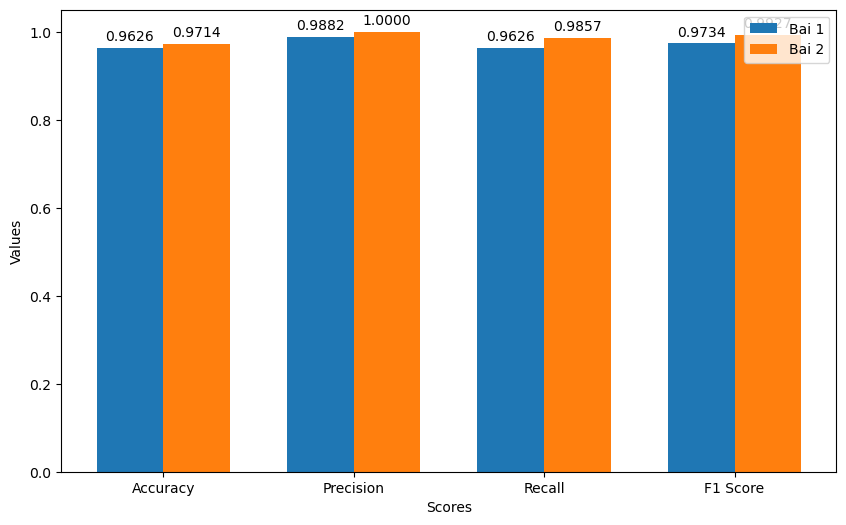

In [98]:
# Danh sách các độ đo và giá trị tương ứng cho từng bài tập
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
bai1_scores = [accuracy1, precision1, recall1, f1_1]
bai2_scores = [accuracy2, precision2, recall2, f1_2]

# Chỉ số cho biểu đồ
x = np.arange(len(metrics))
width = 0.35

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, bai1_scores, width, label='Bai 1')
rects2 = ax.bar(x + width/2, bai2_scores, width, label='Bai 2')

# Thêm nhãn trục x và y
ax.set_xlabel('Scores')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Thêm giá trị trên cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Hiển thị biểu đồ
plt.show()